# **Read Me (IMPORTANT)**

##### **How this file is structured:**

*   All Relevant Impmorts
*   Wintermute Project Dataset
  *   Loading in the Dataset
  *   Data Discovery
  *   Models
      *   Pipelining
      *   Classifiers
      *   Regressors (Do Not Run)
*   Wintermute Feature-Engineered Dataset
  *   Loading in the Dataset
  *   Models
      *   Pipelining
      *   Classifiers
      *   Regressors (Do Not Run)
*   FPMON Feature Engineering Dataset
  *   Loading in the Dataset
  *   Models
      *   Pipelining
      *   Classifiers
      *   Regressors (Do Not Run)
*   Combined Wintermute & FPMON Dataset
  *   Loading in the Dataset
  *   Models
      *   Pipelining
      *   Classifiers
      *   Regressors (Do Not Run)
*   Princeton Dataset Retrieval Attempt (Do Not Run)



##### **How to run this file:**

1. **We highly reccomend not running this file all at once**. As we included code cells showcasing past work, but are not in a runnable format.
2. First run the relevant imports cells (there should be 3)
3. For each dataset, open the main dataset toggle, run all the load dataset cells, then run data discovery cells (if present), next run all the pipelining cells, and lastly run all the classifiers cells in order. It is not needed to run the regressors cells as they are just to showcase past work/attempts. **Run each of the dataset related cells one after each other.**
4.  **IMPORTANT NOTE:**
Some of our files are loaded from a particular folder in our Google Drive, and are pulled from there in order to run our code. An example of our filepath is this: `"/content/drive/MyDrive/Internet Privacy Project cleaned_FPMON_Dataset.csv"`. This filepath must be changed to represent your filepath in order to run the code correctly. The csvs or excels are included in the ZIP folder with the same name, just change the file path to reflect the location. This is also run on google colab, therefore it might have a few google colab imports that also need to be changed. We suggest running this file on google colab for best user experience and efficiency.
The filepaths that need to be changed are in Watermute feature engineered, fpmon feature engineered, and combined dataset.
2.   DO NOT run the Princeton Dataset or the Regressors for each dataset. These are included in order to showcase our past work but are not in a runnable format (they will take too much time or too much storage to run).



# Relevant Imports

In [ ]:
# Relevant Import Statements
import pandas as pd
from google.colab import files
from google.colab import drive


# Data Discovery
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np
import seaborn as sns

# Models
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# KNNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Guassian Process Classifier
from sklearn.gaussian_process import GaussianProcessClassifier
# grid search kernel for gaussian process classifier (hyperparam tuning)
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import WhiteKernel

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# hyperparameter tuning used for naive bayes
from sklearn.model_selection import GridSearchCV

# Measurement Metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix




# Models - Linear Regression
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Models - Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Cross Validation and Accuracy
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Logistic
from sklearn.linear_model import LogisticRegression

# Ridge
from sklearn.linear_model import Ridge

# BaggingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Display Scores Method
def display_scores(scores):
    print("Cross Validation Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Wintermute Project Dataset


### Loading Dataset

In [ ]:

!wget -O  browsererkennung_features_tranco500.csv "https://raw.githubusercontent.com/wintermute-project/private-browserfingerprinting/main/data/browsererkennung_features_tranco500.csv"


--2023-12-14 00:55:19--  https://raw.githubusercontent.com/wintermute-project/private-browserfingerprinting/main/data/browsererkennung_features_tranco500.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18044923 (17M) [text/plain]
Saving to: ‘browsererkennung_features_tranco500.csv’

browsererkennung_fe 100%[===================>]  17.21M  --.-KB/s    in 0.1s    

2023-12-14 00:55:20 (131 MB/s) - ‘browsererkennung_features_tranco500.csv’ saved [18044923/18044923]



In [ ]:
df = pd.read_csv('browsererkennung_features_tranco500.csv')

### Data Discovery


To understand basic stats about our dataset, we do some light information gathering to get an idea of the dataset's columns, # of rows, # of columns and etc.

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Columns: 372 entries, Unnamed: 0 to min_flow_durations
dtypes: float64(326), int64(43), object(3)
memory usage: 12.8+ MB


,Unnamed: 0,total_packets_dl,mean_packets_per_flow_dl,median_packets_per_flow_dl,sd_packets_per_flow_dl,skew_packets_per_flow_dl,kurt_packets_per_flow_dl,max_packets_per_flow_dl,min_packets_per_flow_dl,total_packets_ul,...,kurt_size_of_flows_dl_first40,max_size_of_flows_dl_first40,min_size_of_flows_dl_first40,mean_flow_durations,median_flow_durations,sd_flow_durations,skew_flow_durations,kurt_flow_durations,max_flow_durations,min_flow_durations
count,4495.00000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,...,1209.000000,1.209000e+03,1209.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000
mean,2247.00000,1117.586429,38.297336,10.629588,91.969041,3.408783,15.062115,461.575306,1.400000,1028.830478,...,21.304614,1.740820e+06,172.668321,2172.755145,1385.628810,2481.963939,1.822956,3.342849,7654.217353,23.940823
std,1297.73906,1158.553378,43.927988,16.820046,139.840628,1.951652,19.403851,675.650771,1.398613,964.817923,...,9.662008,1.886526e+06,505.152097,6045.840090,6324.450719,5385.916010,1.045090,4.734972,14522.579025,474.326189
min,0.00000,0.000000,0.000000,0.000000,0.000000,-1.286470,-3.000000,0.000000,0.000000,6.000000,...,-0.579981,5.174500e+04,0.000000,12.500000,9.000000,3.000000,-1.499979,-2.000000,21.000000,0.000000
25%,1123.50000,403.500000,19.326667,8.000000,27.850163,2.115563,3.224597,126.000000,1.000000,398.500000,...,13.964274,6.102650e+05,0.000000,219.468750,54.000000,319.680525,1.154456,-0.066846,1194.500000,4.000000
50%,2247.00000,780.000000,26.526316,10.000000,50.989445,3.170416,9.254223,251.000000,1.000000,764.000000,...,21.514682,1.080420e+06,0.000000,379.200000,95.000000,566.385051,1.805642,2.170650,2204.000000,10.000000
75%,3370.50000,1426.000000,41.815341,11.500000,98.300927,4.467778,19.946692,505.000000,2.000000,1349.000000,...,30.420615,1.954356e+06,136.000000,1046.359048,199.250000,1416.265337,2.457959,5.283336,5969.500000,17.000000
max,4494.00000,12206.000000,974.000000,956.000000,2926.783994,13.741983,210.510052,11532.000000,27.000000,11666.000000,...,35.015829,1.354432e+07,3947.000000,118000.352490,90587.000000,115871.496127,6.898358,54.622029,284565.000000,31593.000000


In [ ]:
print(df.shape[0])
print(df.shape[1])

4495
372


In [ ]:
# observe numerical attributes in the raw data set
df_num = df.select_dtypes(include=[np.number])
df_num.info()
num_attribs = list(df_num)
old_num_attribs = num_attribs
for n in num_attribs:
  print(f"{n} \n")

# observe categorical attributes in the raw data set
df_cat = df.select_dtypes(include=[object])
df_cat.info()
cat_attribs = list(df_cat)
for c in cat_attribs:
  print(f"{c}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Columns: 369 entries, Unnamed: 0 to min_flow_durations
dtypes: float64(326), int64(43)
memory usage: 12.7 MB
Unnamed: 0 

total_packets_dl 

mean_packets_per_flow_dl 

median_packets_per_flow_dl 

sd_packets_per_flow_dl 

skew_packets_per_flow_dl 

kurt_packets_per_flow_dl 

max_packets_per_flow_dl 

min_packets_per_flow_dl 

total_packets_ul 

mean_packets_per_flow_ul 

median_packets_per_flow_ul 

sd_packets_per_flow_ul 

skew_packets_per_flow_ul 

kurt_packets_per_flow_ul 

max_packets_per_flow_ul 

min_packets_per_flow_ul 

total_packets_bi 

mean_packets_per_flow_bi 

median_packets_per_flow_bi 

sd_packets_per_flow_bi 

skew_packets_per_flow_bi 

kurt_packets_per_flow_bi 

max_packets_per_flow_bi 

min_packets_per_flow_bi 

flows_bi 

flows_dl 

flows_ul 

mean_parallel_flows 

median_parallel_flows 

sd_parallel_flows 

skew_parallel_flows 

kurt_parallel_flows 

max_parallel_flows 

min_parallel_flows 

m

'Browser' is likely a quality we are interested in predicting upon, and thus we are interested in how many quantities there are, and how many and what are there for the linked attribute, url.

In [ ]:
df['browser'].unique()

array(['chrome', 'firefox'], dtype=object)

In [ ]:
df['url'].unique()

array(['http://facebook.com', 'http://youtube.com', 'http://google.com',
       'http://twitter.com', 'http://microsoft.com',
       'http://instagram.com', 'http://tmall.com', 'http://linkedin.com',
       'http://apple.com', 'http://wikipedia.org', 'http://live.com',
       'http://doubleclick.net', 'http://baidu.com', 'http://netflix.com',
       'http://yahoo.com', 'http://qq.com', 'http://googletagmanager.com',
       'http://amazon.com', 'http://taobao.com', 'http://youtu.be',
       'http://360.cn', 'http://adobe.com', 'http://pinterest.com',
       'http://sohu.com', 'http://bing.com', 'http://vimeo.com',
       'http://office.com', 'http://reddit.com', 'http://zoom.us',
       'http://jd.com', 'http://wordpress.com', 'http://weibo.com',
       'http://goo.gl', 'http://github.com', 'http://bit.ly',
       'http://microsoftonline.com', 'http://google-analytics.com',
       'http://amazonaws.com', 'http://wordpress.org',
       'http://blogspot.com', 'http://mozilla.org', 'http:/

### Models

#### Pipelines

In [ ]:
del df['Unnamed: 0']
del df['run_id']

In [ ]:
df_dropped_cols = df.dropna(axis='columns')

In [ ]:
print(df_dropped_cols.shape[0])
print(df_dropped_cols.shape[1])

4495
146


In [ ]:
# observe numerical attributes in the raw data set
df_num = df_dropped_cols.select_dtypes(include=[np.number])
df_num.info()
num_attribs = list(df_num)
for n in num_attribs:
  print(f"{n} \n")

# observe categorical attributes in the raw data set
df_cat = df_dropped_cols.select_dtypes(include=[object])
df_cat.info()
cat_attribs = list(df_cat)
for c in cat_attribs:
  print(f"{c}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Columns: 144 entries, total_packets_dl to min_flow_durations
dtypes: float64(102), int64(42)
memory usage: 4.9 MB
total_packets_dl 

mean_packets_per_flow_dl 

median_packets_per_flow_dl 

sd_packets_per_flow_dl 

skew_packets_per_flow_dl 

kurt_packets_per_flow_dl 

max_packets_per_flow_dl 

min_packets_per_flow_dl 

total_packets_ul 

mean_packets_per_flow_ul 

median_packets_per_flow_ul 

sd_packets_per_flow_ul 

skew_packets_per_flow_ul 

kurt_packets_per_flow_ul 

max_packets_per_flow_ul 

min_packets_per_flow_ul 

total_packets_bi 

mean_packets_per_flow_bi 

median_packets_per_flow_bi 

sd_packets_per_flow_bi 

skew_packets_per_flow_bi 

kurt_packets_per_flow_bi 

max_packets_per_flow_bi 

min_packets_per_flow_bi 

flows_bi 

flows_dl 

flows_ul 

mean_parallel_flows 

median_parallel_flows 

sd_parallel_flows 

skew_parallel_flows 

kurt_parallel_flows 

max_parallel_flows 

min_parallel_flows 

src_port_

In [ ]:
browser = df_dropped_cols['browser']

total_packets_dl            1.000000
total_packets_bi            0.993006
ack_occurences_packets      0.975718
tcp_occurences_packets      0.975105
total_packets_ul            0.966236
                              ...   
dst_ip_entropy_packets     -0.188655
dst_port_entropy_packets   -0.198544
src_port_entropy_packets   -0.260430
dst_port_entropy_flows     -0.357064
src_ip_entropy_flows             NaN
Name: total_packets_dl, Length: 144, dtype: float64


In [ ]:
cat_attribs.remove("browser")
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [ ]:
del df_dropped_cols['browser']

In [ ]:
# split to train and train
X_train, X_test, y_train, y_test = train_test_split(
  df_dropped_cols, browser, random_state=104, test_size=0.20)

X_prepared_train = full_pipeline.fit_transform(X_train)
X_prepared_test = full_pipeline.transform(X_test)

enc = OrdinalEncoder()

temp_ytrain = pd.Series(y_train)
new_y_train = temp_ytrain.values
y_prepared_train = enc.fit_transform(new_y_train.reshape(-1,1))
y_prepared_test = enc.transform(y_test.values.reshape(-1,1))


In [ ]:
print(y_test) # Class Labels for matrix is in the order of firefox, chrome.

4117    firefox
2753     chrome
84      firefox
3917    firefox
1581    firefox
         ...   
3533     chrome
3438    firefox
3046    firefox
1000    firefox
2685    firefox
Name: browser, Length: 899, dtype: object


#### Classifiers

Random Forest Classifer

In [ ]:
clf = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=25)
clf.fit(X_prepared_train, y_train)
y_pred = clf.predict(X_prepared_test)

print("Score")
print(clf.score(X_prepared_test, y_test))
print(clf.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.932146829810901
0.9560622914349277
Classification Report
              precision    recall  f1-score   support

      chrome       0.96      0.91      0.93       453
     firefox       0.91      0.96      0.93       446

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899

Accuracy: 0.932146829810901


Confusion Matrix for Random Forest Classifier

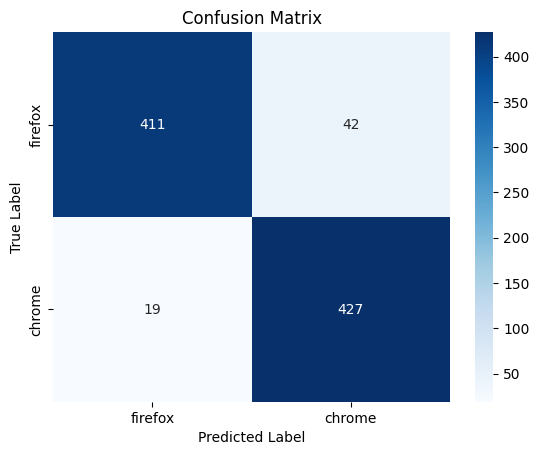

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

class_labels = ["firefox", "chrome"]

# Create a heatmap using Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

KNearestNeighbors

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=8) #8
neigh.fit(X_prepared_train, y_train)

y_pred = neigh.predict(X_prepared_test)

print("Score")
print(neigh.score(X_prepared_test, y_test))
print(neigh.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.9032258064516129
0.9349276974416018
Classification Report
              precision    recall  f1-score   support

      chrome       0.88      0.94      0.91       453
     firefox       0.94      0.86      0.90       446

    accuracy                           0.90       899
   macro avg       0.91      0.90      0.90       899
weighted avg       0.91      0.90      0.90       899

Accuracy: 0.9032258064516129


Naive Bayes Classifier (BEFORE HYPERPARAM TUNING)

In [ ]:
clf = GaussianNB()
X_prepared_train_array = X_prepared_train.toarray()
X_prepared_test_array = X_prepared_test.toarray()

clf.fit(X_prepared_train_array, y_train)
y_pred = clf.predict(X_prepared_test_array)

print("Score")
print(clf.score(X_prepared_test_array, y_test))
print(clf.score(X_prepared_train_array, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.8053392658509455
0.8462180200222469
Classification Report
              precision    recall  f1-score   support

      chrome       0.88      0.71      0.79       453
     firefox       0.75      0.91      0.82       446

    accuracy                           0.81       899
   macro avg       0.82      0.81      0.80       899
weighted avg       0.82      0.81      0.80       899

Accuracy: 0.8053392658509455


Naive Bayes Classifier (AFTER HYPERPARAM TUNING)

In [ ]:
# implemented grid search

X_prepared_train_array = X_prepared_train.toarray()
X_prepared_test_array = X_prepared_test.toarray()

parameters = {'var_smoothing': np.logspace(0,-8, num=5)} # var_smoothing from 1e0 to 1e-3
grid_search = GridSearchCV(estimator=clf, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_prepared_train_array, y_train)
best_var_smoothing = grid_search.best_params_['var_smoothing']
best_clf = GaussianNB(var_smoothing=best_var_smoothing)
best_clf.fit(X_prepared_train_array, y_train)

# clf.fit(X_prepared_train, y_train)
# y_pred = clf.predict(X_prepared_test)
y_pred = best_clf.predict(X_prepared_test_array)

print("Score")
print(best_clf.score(X_prepared_test_array, y_test))
print(best_clf.score(X_prepared_train_array, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.8531701890989989
0.8654060066740823
Classification Report
              precision    recall  f1-score   support

      chrome       0.89      0.80      0.85       453
     firefox       0.82      0.90      0.86       446

    accuracy                           0.85       899
   macro avg       0.86      0.85      0.85       899
weighted avg       0.86      0.85      0.85       899

Accuracy: 0.8531701890989989


Neural Net Classifier (BEFORE HYPERPARAM TUNING)

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_prepared_train, y_train)
y_pred = clf.predict(X_prepared_test)

print("Score")
print(clf.score(X_prepared_test, y_test))
print(clf.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.9710789766407119
1.0
Classification Report
              precision    recall  f1-score   support

      chrome       0.97      0.97      0.97       453
     firefox       0.97      0.97      0.97       446

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899

Accuracy: 0.9710789766407119


Neural Net Classifier (AFTER HYPERPARAM TUNING)

In [ ]:
# changed solver to sgd and changed hidden layer size from (5, 2) to (10, 2)

clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(10, 2), random_state=1)
clf.fit(X_prepared_train, y_train)
y_pred = clf.predict(X_prepared_test)

print("Score")
print(clf.score(X_prepared_test, y_test))
print(clf.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.9388209121245829
0.957174638487208
Classification Report
              precision    recall  f1-score   support

      chrome       0.95      0.93      0.94       453
     firefox       0.93      0.95      0.94       446

    accuracy                           0.94       899
   macro avg       0.94      0.94      0.94       899
weighted avg       0.94      0.94      0.94       899

Accuracy: 0.9388209121245829


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix for Neural Net Classifer

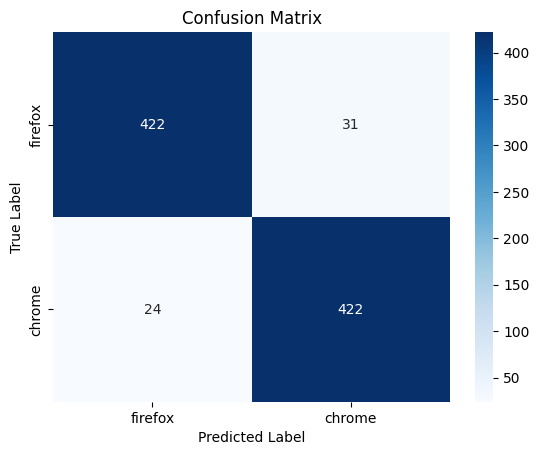

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

class_labels = ["firefox", "chrome"]

# Create a heatmap using Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Gaussian Process Classifier

In [ ]:
clf = GaussianProcessClassifier()
clf.fit(X_prepared_train.toarray(), y_train)
y_pred = clf.predict(X_prepared_test.toarray())

print("Score")
print(clf.score(X_prepared_test.toarray(), y_test))
print(clf.score(X_prepared_train.toarray(), y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.9521690767519466
1.0
Classification Report
              precision    recall  f1-score   support

      chrome       0.94      0.96      0.95       453
     firefox       0.96      0.94      0.95       446

    accuracy                           0.95       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.95      0.95      0.95       899

Accuracy: 0.9521690767519466


Gaussian Process Classifier (AFTER HYPERPARAM TUNING)

In [ ]:
clf = GaussianProcessClassifier(kernel = 1*RationalQuadratic(alpha=1, length_scale=1))
clf.fit(X_prepared_train.toarray(), y_train)
y_pred = clf.predict(X_prepared_test.toarray())

print("Score")
print(clf.score(X_prepared_test.toarray(), y_test))
print(clf.score(X_prepared_train.toarray(), y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Score
0.982202447163515
1.0
Classification Report
              precision    recall  f1-score   support

      chrome       0.98      0.98      0.98       453
     firefox       0.98      0.98      0.98       446

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899

Accuracy: 0.982202447163515


#### Regressors

Linear Reg

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_prepared_train, y_prepared_train)

# Make predictions using the test set
y_pred = regr.predict(X_prepared_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_prepared_test, y_pred))
mse = mean_squared_error(y_prepared_test, y_pred)
rmse = np.sqrt(mse)
print(f"rmse is {rmse}")



Random Forest Regressor

In [ ]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_prepared_train, y_prepared_train)

X_predictions = forest_reg.predict(X_prepared_test) #<---- test
forest_mse = mean_squared_error(y_prepared_test, X_predictions) #<----test
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
def display_scores(scores):
    print("Cross Validation Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
forest_scores = cross_val_score(forest_reg, X_prepared_train, y_prepared_train,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Logistic Regression

In [ ]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_prepared_train, y_prepared_train)

X_predictions = log_reg.predict(X_prepared_test)
log_mse = mean_squared_error(y_prepared_test, X_predictions)
log_rmse = np.sqrt(log_mse)
log_rmse

Ridge

In [ ]:
log_reg = Ridge()
log_reg.fit(X_prepared_train, y_prepared_train)

X_predictions = log_reg.predict(X_prepared_test)
log_mse = mean_squared_error(y_prepared_test, X_predictions)
log_rmse = np.sqrt(log_mse)
log_rmse

baggingregressor

In [ ]:
log_reg = BaggingRegressor(base_estimator = KNeighborsRegressor(), random_state=42)
log_reg.fit(X_prepared_train, y_prepared_train)

X_predictions = log_reg.predict(X_prepared_test)
log_mse = mean_squared_error(y_prepared_test, X_predictions)
log_rmse = np.sqrt(log_mse)
log_rmse

# Wintermute Project Dataset With Feature Engineering

We are interested in classifying upon more than just browser. We pose the hypothesis, do browser fingerprinting technqiues have trends with website industries that are enacting these browser fingerprinting techniques?

To discover trends around this question, we feature engineer our url feature to include a new column called industry, which we will now predict upon.

### Loading Wintermute FE Dataset

In [ ]:
file_path = "/content/drive/MyDrive/Internet Privacy Project/privacy_dataset_50.xlsx"
# # "/content/drive/MyDrive/privacy_dataset_50.xlxs"

# file_path = "privacy_dataset_50.xlsx"

df = pd.read_excel(file_path)

In [ ]:
df.describe()

,Column1,total_packets_dl,mean_packets_per_flow_dl,median_packets_per_flow_dl,sd_packets_per_flow_dl,skew_packets_per_flow_dl,kurt_packets_per_flow_dl,max_packets_per_flow_dl,min_packets_per_flow_dl,total_packets_ul,...,kurt_size_of_flows_dl_first40,max_size_of_flows_dl_first40,min_size_of_flows_dl_first40,mean_flow_durations,median_flow_durations,sd_flow_durations,skew_flow_durations,kurt_flow_durations,max_flow_durations,min_flow_durations
count,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,...,187.000000,1.870000e+02,187.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000
mean,2070.545263,1228.305263,37.229587,10.252632,99.052689,3.941814,18.804769,548.717895,1.391579,1145.536842,...,23.313809,2.469673e+06,277.379679,1420.810637,378.363158,1964.815703,2.027172,3.917738,6308.075789,12.111579
std,1297.794627,1022.811504,30.162517,3.074732,121.917869,1.924140,19.276351,678.986062,1.282112,843.044118,...,9.584172,2.420757e+06,698.451652,3418.960608,2127.575539,3863.052718,0.843064,4.059861,10608.054462,19.457467
min,1.000000,21.000000,3.500000,4.000000,2.929733,-0.243969,-1.793383,7.000000,0.000000,33.000000,...,3.680478,2.138910e+05,0.000000,50.181818,14.000000,43.073867,-0.988257,-1.884578,162.000000,0.000000
25%,962.500000,548.000000,21.320513,8.750000,34.238702,2.587407,5.707197,159.500000,1.000000,560.000000,...,13.931698,9.139465e+05,0.000000,280.865203,57.000000,429.649562,1.465179,0.878625,1738.000000,3.000000
50%,1996.000000,870.000000,27.423077,10.000000,63.336359,3.711596,13.253837,324.000000,1.000000,881.000000,...,25.709117,1.342326e+06,0.000000,399.704545,89.000000,634.537571,2.042685,3.278509,2432.000000,9.000000
75%,3120.500000,1663.500000,44.639103,11.000000,113.553053,4.995311,25.473733,674.500000,2.000000,1555.000000,...,33.118401,3.131560e+06,229.000000,666.194368,161.000000,1025.173578,2.536216,5.914855,4051.500000,15.000000
max,4466.000000,6949.000000,277.473684,30.000000,1010.079068,11.435835,137.379701,4635.000000,7.000000,5287.000000,...,35.014185,1.354432e+07,3947.000000,36103.500000,41412.500000,26995.188115,4.271522,20.776451,81010.000000,257.000000


In [ ]:
del df["Column1"]

In [ ]:
print(df.shape[0])
print(df.shape[1])

475
372


### Models

Once again our chosen label is industry. The general strategy is as follows:

1.   Clean data further from the Wintermute FE dataset
2.   Create numerical and categorical pipelines
1.   Split the data into 80/20 splits for training and test subsets
1.   Run relevant classifications models
1.   Measure relevant models with relevant metrics

#### Pipelining

In [ ]:
del df['run_id']

In [ ]:
# as we have large dimensionality, and are working with non raw data (like maxs
# mins, stds, etc we do not want to impute for NA values and instead remove
# NA by columns in order to help reduce our dimensionality
df_dropped_cols = df.dropna(axis='columns')

In [ ]:
print(df_dropped_cols.shape[0])
print(df_dropped_cols.shape[1])

# observe numerical attributes in the raw data set
df_num = df_dropped_cols.select_dtypes(include=[np.number])
df_num.info()
num_attribs = list(df_num)
for n in num_attribs:
  print(f"{n} \n")

# observe categorical attributes in the raw data set
df_cat = df_dropped_cols.select_dtypes(include=[object])
df_cat.info()
cat_attribs = list(df_cat)
for c in cat_attribs:
  print(f"{c}\n")

475
231
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Columns: 228 entries, total_packets_dl to min_flow_durations
dtypes: float64(152), int64(76)
memory usage: 846.2 KB
total_packets_dl 

mean_packets_per_flow_dl 

median_packets_per_flow_dl 

sd_packets_per_flow_dl 

skew_packets_per_flow_dl 

kurt_packets_per_flow_dl 

max_packets_per_flow_dl 

min_packets_per_flow_dl 

total_packets_ul 

mean_packets_per_flow_ul 

median_packets_per_flow_ul 

sd_packets_per_flow_ul 

skew_packets_per_flow_ul 

kurt_packets_per_flow_ul 

max_packets_per_flow_ul 

min_packets_per_flow_ul 

total_packets_bi 

mean_packets_per_flow_bi 

median_packets_per_flow_bi 

sd_packets_per_flow_bi 

skew_packets_per_flow_bi 

kurt_packets_per_flow_bi 

max_packets_per_flow_bi 

min_packets_per_flow_bi 

flows_bi 

flows_dl 

flows_ul 

mean_parallel_flows 

median_parallel_flows 

sd_parallel_flows 

skew_parallel_flows 

kurt_parallel_flows 

max_parallel_flows 

min_parallel_flows 

m

In [ ]:
industry = df_dropped_cols['industry']
del df_dropped_cols['industry']

In [ ]:
cat_attribs.remove("industry")
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [ ]:
# split to train and train
X_train, X_test, y_train, y_test = train_test_split(
  df_dropped_cols, industry, random_state=104, test_size=0.20)

X_prepared_train = full_pipeline.fit_transform(X_train)
X_prepared_test = full_pipeline.transform(X_test)

enc = OrdinalEncoder()

temp_ytrain = pd.Series(y_train)
new_y_train = temp_ytrain.values
y_prepared_train = enc.fit_transform(new_y_train.reshape(-1,1))
y_prepared_test = enc.transform(y_test.values.reshape(-1,1))

In [ ]:
y_test.to_string()

'58       e-commerce\n41       e-commerce\n161            news\n269    social media\n261    social media\n322            tech\n49       e-commerce\n123            news\n286    social media\n439       streaming\n68       e-commerce\n172            news\n395       streaming\n106            news\n63       e-commerce\n409       streaming\n17       e-commerce\n103            news\n100            news\n257    social media\n167            news\n367            tech\n143            news\n148            news\n111            news\n344            tech\n441       streaming\n51       e-commerce\n463       streaming\n113            news\n468       streaming\n254    social media\n117            news\n370            tech\n461       streaming\n108            news\n347            tech\n84       e-commerce\n438       streaming\n55       e-commerce\n128            news\n242    social media\n226    social media\n203    social media\n435       streaming\n381       streaming\n62       e-commerce\n157         

#### Classifiers

Random Forest Classifier

In [ ]:
clf = RandomForestClassifier(max_depth=7, random_state=0, n_estimators=20)
clf.fit(X_prepared_train, y_train)
y_pred = clf.predict(X_prepared_test)

print("Score")
print(clf.score(X_prepared_test, y_test))
print(clf.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.9263157894736842
0.9973684210526316
Classification Report
              precision    recall  f1-score   support

  e-commerce       0.94      0.89      0.91        18
        news       0.90      0.93      0.91        28
social media       0.87      1.00      0.93        13
   streaming       0.95      0.88      0.91        24
        tech       1.00      1.00      1.00        12

    accuracy                           0.93        95
   macro avg       0.93      0.94      0.93        95
weighted avg       0.93      0.93      0.93        95

Accuracy: 0.9263157894736842


Confusion Matrix for Random Forest Classifier

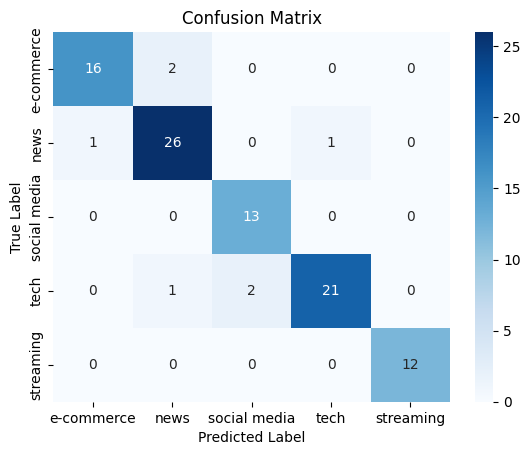

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

class_labels = ["e-commerce", "news", "social media", "tech", "streaming"]

# Create a heatmap using Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

KNearestNeighbors

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_prepared_train, y_train)

y_pred = neigh.predict(X_prepared_test)

print("Score")
print(neigh.score(X_prepared_test, y_test))
print(neigh.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.8947368421052632
0.9710526315789474
Classification Report
              precision    recall  f1-score   support

  e-commerce       0.94      0.89      0.91        18
        news       0.90      0.93      0.91        28
social media       0.81      1.00      0.90        13
   streaming       0.95      0.75      0.84        24
        tech       0.86      1.00      0.92        12

    accuracy                           0.89        95
   macro avg       0.89      0.91      0.90        95
weighted avg       0.90      0.89      0.89        95

Accuracy: 0.8947368421052632


Naive Bayes Classifier (BEFORE HYPERPARAM TUNING)

In [ ]:
clf = GaussianNB()

clf.fit(X_prepared_train, y_train)
y_pred = clf.predict(X_prepared_test)

print("Score")
print(clf.score(X_prepared_test, y_test))
print(clf.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
1.0
1.0
Classification Report
              precision    recall  f1-score   support

  e-commerce       1.00      1.00      1.00        18
        news       1.00      1.00      1.00        28
social media       1.00      1.00      1.00        13
   streaming       1.00      1.00      1.00        24
        tech       1.00      1.00      1.00        12

    accuracy                           1.00        95
   macro avg       1.00      1.00      1.00        95
weighted avg       1.00      1.00      1.00        95

Accuracy: 1.0


Naive Bayes Classifier (AFTER HYPERPARAM TUNING)

In [ ]:
# changed log space to (0, -2)

parameters = {'var_smoothing': np.logspace(0,-2, num=5)}
grid_search = GridSearchCV(estimator=clf, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_prepared_train, y_train)
best_var_smoothing = grid_search.best_params_['var_smoothing']
best_clf = GaussianNB(var_smoothing=best_var_smoothing)
best_clf.fit(X_prepared_train, y_train)

# clf.fit(X_prepared_train, y_train)
# y_pred = clf.predict(X_prepared_test)
y_pred = best_clf.predict(X_prepared_test)

print("Score")
print(best_clf.score(X_prepared_test, y_test))
print(best_clf.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.9052631578947369
0.8763157894736842
Classification Report
              precision    recall  f1-score   support

  e-commerce       0.94      0.94      0.94        18
        news       0.96      0.86      0.91        28
social media       1.00      0.77      0.87        13
   streaming       0.86      1.00      0.92        24
        tech       0.79      0.92      0.85        12

    accuracy                           0.91        95
   macro avg       0.91      0.90      0.90        95
weighted avg       0.91      0.91      0.90        95

Accuracy: 0.9052631578947369


Neural Net Classifier (BEFORE HYPERPARAM TUNING)

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_prepared_train, y_train)
y_pred = clf.predict(X_prepared_test)

print("Score")
print(clf.score(X_prepared_test, y_test))
print(clf.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.6736842105263158
0.9
Classification Report
              precision    recall  f1-score   support

  e-commerce       1.00      0.61      0.76        18
        news       0.74      0.50      0.60        28
social media       0.55      0.85      0.67        13
   streaming       0.86      0.75      0.80        24
        tech       0.42      0.83      0.56        12

    accuracy                           0.67        95
   macro avg       0.71      0.71      0.68        95
weighted avg       0.75      0.67      0.68        95

Accuracy: 0.6736842105263158


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Neural Net Classifier (AFTER HYPERPARAM TUNING)

In [ ]:
# changed hidden layer sizes to (10, 4)

clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10, 4), random_state=7)
clf.fit(X_prepared_train, y_train)
y_pred = clf.predict(X_prepared_test)

print("Score")
print(clf.score(X_prepared_test, y_test))
print(clf.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.7789473684210526
0.95
Classification Report
              precision    recall  f1-score   support

  e-commerce       0.86      0.67      0.75        18
        news       0.88      0.75      0.81        28
social media       0.59      1.00      0.74        13
   streaming       0.83      0.79      0.81        24
        tech       0.75      0.75      0.75        12

    accuracy                           0.78        95
   macro avg       0.78      0.79      0.77        95
weighted avg       0.80      0.78      0.78        95

Accuracy: 0.7789473684210526


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Gaussian Process Classifier

In [ ]:
clf = GaussianProcessClassifier()
clf.fit(X_prepared_train, y_train)
y_pred = clf.predict(X_prepared_test)

print("Score")
print(clf.score(X_prepared_test, y_test))
print(clf.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.7894736842105263
1.0
Classification Report
              precision    recall  f1-score   support

  e-commerce       1.00      0.56      0.71        18
        news       1.00      0.82      0.90        28
social media       1.00      0.85      0.92        13
   streaming       0.95      0.79      0.86        24
        tech       0.39      1.00      0.56        12

    accuracy                           0.79        95
   macro avg       0.87      0.80      0.79        95
weighted avg       0.91      0.79      0.82        95

Accuracy: 0.7894736842105263


Gaussian Process Classifier with Tuning

In [ ]:
clf = GaussianProcessClassifier(kernel = 1*RationalQuadratic(alpha=1, length_scale=1))
clf.fit(X_prepared_train, y_train)
y_pred = clf.predict(X_prepared_test)

print("Score")
print(clf.score(X_prepared_test, y_test))
print(clf.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Score
0.8210526315789474
0.9
Classification Report
              precision    recall  f1-score   support

  e-commerce       0.88      0.83      0.86        18
        news       0.79      0.96      0.87        28
social media       0.67      0.92      0.77        13
   streaming       0.91      0.88      0.89        24
        tech       1.00      0.25      0.40        12

    accuracy                           0.82        95
   macro avg       0.85      0.77      0.76        95
weighted avg       0.85      0.82      0.80        95

Accuracy: 0.8210526315789474


#### Regressors

Linear Reg

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_prepared_train, y_prepared_train)

# Make predictions using the test set
y_pred = regr.predict(X_prepared_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_prepared_test, y_pred))
mse = mean_squared_error(y_prepared_test, y_pred)
rmse = np.sqrt(mse)
print(f"rmse is {rmse}")

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_prepared_train, y_prepared_train)

X_predictions = forest_reg.predict(X_prepared_test)
forest_mse = mean_squared_error(y_prepared_test, X_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
def display_scores(scores):
    print("Cross Validation Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_prepared_train, y_prepared_train,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_prepared_train, y_prepared_train)

X_predictions = log_reg.predict(X_prepared_test)
log_mse = mean_squared_error(y_prepared_test, X_predictions)
log_rmse = np.sqrt(log_mse)
log_rmse

Ridge

In [ ]:
from sklearn.linear_model import Ridge

log_reg = Ridge()
log_reg.fit(X_prepared_train, y_prepared_train)

X_predictions = log_reg.predict(X_prepared_test)
log_mse = mean_squared_error(y_prepared_test, X_predictions)
log_rmse = np.sqrt(log_mse)
log_rmse

baggingregressor

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor


log_reg = BaggingRegressor(base_estimator = KNeighborsRegressor(), random_state=42)
log_reg.fit(X_prepared_train, y_prepared_train)

X_predictions = log_reg.predict(X_prepared_test)
log_mse = mean_squared_error(y_prepared_test, X_predictions)
log_rmse = np.sqrt(log_mse)
log_rmse

# FPMON Feature Engineered Dataset

### Loading FPMON Feature Engineering Dataset

In [ ]:
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Internet Privacy Project/cleaned_FPMON_Dataset.csv"
fpmon_df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
del fpmon_df['nan']
fpmon_df

,Browser,Company,Industry,url,% JS Attr. Tracked,% FP Features,% Aggr. Features,Online status,Storage,User agent,...,CPU class,Vendor sub,Canvas,Audio,Browser language,Java enabled,System language,Drag and drop,Device Memory,App Version
0,Chrome,amazon,e-commerce,http://amazon.com,48.70%,55.00%,55.56%,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Chrome,ebay,e-commerce,http://ebay.com,24.35%,27.50%,16.67%,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Chrome,best buy,e-commerce,http://bestbuy.com,48.70%,57.50%,66.67%,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Chrome,craigslist,e-commerce,http://craigslist.org,15.65%,15.00%,0.00%,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Chrome,etsy,e-commerce,http://etsy.com,34.78%,45.00%,55.56%,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Firefox,vimeo,streaming,http://vimeo.com,15%,20%,6%,0,1,1,...,0,0,0,0,0,0,0,0,0,0
96,Firefox,youtube,streaming,http://youtube.com,26%,30%,28%,1,1,1,...,0,0,0,0,0,0,0,0,0,0
97,Firefox,google video,streaming,http://googlevideo.com,5%,5%,0%,0,0,1,...,0,0,0,0,0,0,0,0,0,0
98,Firefox,bilibili,streaming,http://bilibili.com,59%,58%,67%,0,1,1,...,1,0,1,1,1,0,0,0,0,0


In [ ]:
fpmon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Browser                  100 non-null    object
 1   Company                  100 non-null    object
 2   Industry                 100 non-null    object
 3   url                      100 non-null    object
 4   % JS Attr. Tracked       100 non-null    object
 5   % FP Features            93 non-null     object
 6   % Aggr. Features         93 non-null     object
 7   Online status            100 non-null    int64 
 8   Storage                  100 non-null    int64 
 9   User agent               100 non-null    int64 
 10  Platform                 100 non-null    int64 
 11  Mobile                   100 non-null    int64 
 12  Content language         100 non-null    int64 
 13  DoNotTrack               100 non-null    int64 
 14  Cookies enabled          100 non-null    in

In [ ]:
# drop rows with null values
fpmon_df.dropna(inplace=True)
fpmon_df.info

<bound method DataFrame.info of     Browser       Company    Industry                     url  \
0    Chrome        amazon  e-commerce       http://amazon.com   
1    Chrome          ebay  e-commerce         http://ebay.com   
2    Chrome      best buy  e-commerce      http://bestbuy.com   
3    Chrome    craigslist  e-commerce   http://craigslist.org   
4    Chrome          etsy  e-commerce         http://etsy.com   
..      ...           ...         ...                     ...   
94  Firefox          espn   streaming         http://espn.com   
95  Firefox         vimeo   streaming        http://vimeo.com   
96  Firefox       youtube   streaming      http://youtube.com   
97  Firefox  google video   streaming  http://googlevideo.com   
98  Firefox      bilibili   streaming     http://bilibili.com   

   % JS Attr. Tracked % FP Features % Aggr. Features  Online status  Storage  \
0              48.70%        55.00%           55.56%              1        1   
1              24.35%      

### Models

Once again our chosen label is industry. The general strategy is as follows:

1.   Clean data further from the fpmon fe dataset
2.   Create numerical and categorical pipelines
1.   Split the data into 80/20 splits for training and test subsets
1.   Run relevant classifications models
1.   Measure relevant models with relevant metrics

#### Pipelining

In [ ]:
# getting labels and doing deletions
industry = fpmon_df['Industry']
del fpmon_df['Company']
del fpmon_df['Industry']

In [ ]:
# observe numerical attributes in the raw data set
df_num = fpmon_df.select_dtypes(include=[np.number])
df_num.info()
num_attribs = list(df_num)
for n in num_attribs:
  print(f"{n} \n")

# observe categorical attributes in the raw data set
df_cat = fpmon_df.select_dtypes(include=[object])
df_cat.info()
cat_attribs = list(df_cat)
for c in cat_attribs:
  print(f"{c}\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 98
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Online status            93 non-null     int64
 1   Storage                  93 non-null     int64
 2   User agent               93 non-null     int64
 3   Platform                 93 non-null     int64
 4   Mobile                   93 non-null     int64
 5   Content language         93 non-null     int64
 6   DoNotTrack               93 non-null     int64
 7   Cookies enabled          93 non-null     int64
 8   Vendor                   93 non-null     int64
 9   Timezone                 93 non-null     int64
 10  Product                  93 non-null     int64
 11  Flash                    93 non-null     int64
 12  Geolocation              93 non-null     int64
 13  Connection               93 non-null     int64
 14  CPU concurrency          93 non-null     int64
 15  Device m

In [ ]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

In [ ]:
# split to train and train
X_train, X_test, y_train, y_test = train_test_split(
  fpmon_df, industry, random_state=104, test_size=0.20)

X_prepared_train = full_pipeline.fit_transform(X_train)
X_prepared_test = full_pipeline.transform(X_test)

enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

temp_ytrain = pd.Series(y_train)
new_y_train = temp_ytrain.values
y_prepared_train = enc.fit_transform(new_y_train.reshape(-1,1))
y_prepared_test = enc.transform(y_test.values.reshape(-1,1))

In [ ]:
print(y_test)

27    social media
64            news
20    social media
23    social media
50      e-commerce
53      e-commerce
39            tech
69            news
21    social media
36            tech
85            tech
15            news
32            tech
0       e-commerce
16            news
44       streaming
97       streaming
91       streaming
67            news
Name: Industry, dtype: object


#### Classifiers

Random Forest Classifier

In [ ]:
clf = RandomForestClassifier(max_depth=7, random_state=0, n_estimators=45)
clf.fit(X_prepared_train, y_train)
y_pred = clf.predict(X_prepared_test)

print("Score")
print(clf.score(X_prepared_test, y_test))
print(clf.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.6842105263157895
0.9864864864864865
Classification Report
              precision    recall  f1-score   support

  e-commerce       0.33      0.33      0.33         3
        news       0.71      1.00      0.83         5
social media       1.00      0.25      0.40         4
   streaming       1.00      0.67      0.80         3
        tech       0.67      1.00      0.80         4

    accuracy                           0.68        19
   macro avg       0.74      0.65      0.63        19
weighted avg       0.75      0.68      0.65        19

Accuracy: 0.6842105263157895


Random Forest Classifier with Tuning

In [ ]:
clf = RandomForestClassifier(max_depth=7, random_state=0, n_estimators=21, min_samples_split = 21)
clf.fit(X_prepared_train, y_train)
y_pred = clf.predict(X_prepared_test)

print("Score")
print(clf.score(X_prepared_test, y_test))
print(clf.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.6842105263157895
0.8513513513513513
Classification Report
              precision    recall  f1-score   support

  e-commerce       0.60      1.00      0.75         3
        news       0.67      0.80      0.73         5
social media       0.33      0.25      0.29         4
   streaming       1.00      0.33      0.50         3
        tech       1.00      1.00      1.00         4

    accuracy                           0.68        19
   macro avg       0.72      0.68      0.65        19
weighted avg       0.71      0.68      0.66        19

Accuracy: 0.6842105263157895


KNearestNeighbors

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5, weights= "uniform")
neigh.fit(X_prepared_train, y_train)

y_pred = neigh.predict(X_prepared_test)

print("Score")
print(neigh.score(X_prepared_test, y_test))
print(neigh.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.631578947368421
0.6621621621621622
Classification Report
              precision    recall  f1-score   support

  e-commerce       0.33      0.33      0.33         3
        news       0.80      0.80      0.80         5
social media       0.67      0.50      0.57         4
   streaming       1.00      0.33      0.50         3
        tech       0.57      1.00      0.73         4

    accuracy                           0.63        19
   macro avg       0.67      0.59      0.59        19
weighted avg       0.68      0.63      0.62        19

Accuracy: 0.631578947368421


Naive Bayes Classifier (BEFORE HYPERPARAM TUNING)

In [ ]:
clf = GaussianNB()
X_prepared_train_array = X_prepared_train.toarray()
X_prepared_test_array = X_prepared_test.toarray()
clf.fit(X_prepared_train_array, y_train)
y_pred = clf.predict(X_prepared_test_array)

print("Score")
print(clf.score(X_prepared_test_array, y_test))
print(clf.score(X_prepared_train_array, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.5789473684210527
1.0
Classification Report
              precision    recall  f1-score   support

  e-commerce       0.50      0.33      0.40         3
        news       0.67      0.80      0.73         5
social media       0.00      0.00      0.00         4
   streaming       0.40      0.67      0.50         3
        tech       0.80      1.00      0.89         4

    accuracy                           0.58        19
   macro avg       0.47      0.56      0.50        19
weighted avg       0.49      0.58      0.52        19

Accuracy: 0.5789473684210527


Naive Bayes Classifier (AFTER HYPERPARAM TUNING)

In [ ]:

X_prepared_train_array = X_prepared_train.toarray()
X_prepared_test_array = X_prepared_test.toarray()

parameters = {'var_smoothing': np.logspace(0,-1, num=10)}
grid_search = GridSearchCV(estimator=clf, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_prepared_train_array, y_train)
best_var_smoothing = grid_search.best_params_['var_smoothing']
best_clf = GaussianNB(var_smoothing=best_var_smoothing)
best_clf.fit(X_prepared_train_array, y_train)

y_pred = best_clf.predict(X_prepared_test_array)

print("Score")
print(best_clf.score(X_prepared_test_array, y_test))
print(best_clf.score(X_prepared_train_array, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.5263157894736842
0.9054054054054054
Classification Report
              precision    recall  f1-score   support

  e-commerce       1.00      0.33      0.50         3
        news       0.67      0.80      0.73         5
social media       0.00      0.00      0.00         4
   streaming       0.20      0.33      0.25         3
        tech       0.67      1.00      0.80         4

    accuracy                           0.53        19
   macro avg       0.51      0.49      0.46        19
weighted avg       0.51      0.53      0.48        19

Accuracy: 0.5263157894736842


Neural Net Classifier (BEFORE HYPERPARAM TUNING)

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_prepared_train, y_train)
y_pred = clf.predict(X_prepared_test)

print("Score")
print(clf.score(X_prepared_test, y_test))
print(clf.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.47368421052631576
0.7567567567567568
Classification Report
              precision    recall  f1-score   support

  e-commerce       0.12      0.33      0.18         3
        news       1.00      1.00      1.00         5
social media       0.00      0.00      0.00         4
   streaming       1.00      0.33      0.50         3
        tech       0.40      0.50      0.44         4

    accuracy                           0.47        19
   macro avg       0.51      0.43      0.43        19
weighted avg       0.53      0.47      0.46        19

Accuracy: 0.47368421052631576


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Neural Net Classifier (AFTER HYPERPARAM TUNING)

In [ ]:
# changed random state to 7, learning rate to adaptive, and solver to adam

clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=7, activation='identity', learning_rate='adaptive')
clf.fit(X_prepared_train, y_train)
y_pred = clf.predict(X_prepared_test)

print("Score")
print(clf.score(X_prepared_test, y_test))
print(clf.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.7368421052631579
0.9324324324324325
Classification Report
              precision    recall  f1-score   support

  e-commerce       1.00      0.67      0.80         3
        news       1.00      1.00      1.00         5
social media       1.00      0.50      0.67         4
   streaming       0.33      0.67      0.44         3
        tech       0.75      0.75      0.75         4

    accuracy                           0.74        19
   macro avg       0.82      0.72      0.73        19
weighted avg       0.84      0.74      0.76        19

Accuracy: 0.7368421052631579


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix for Neural Net Classifier

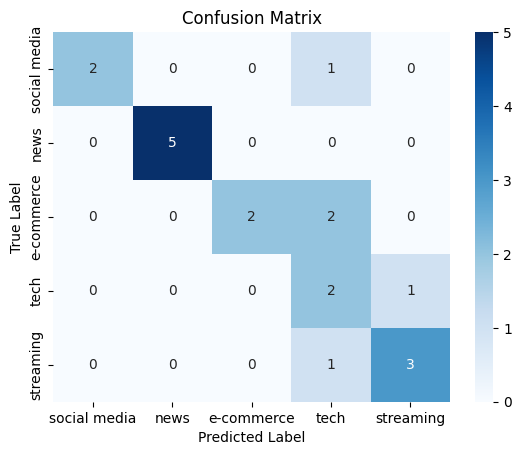

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

class_labels = ["social media", "news", "e-commerce", "tech", "streaming"]

# Create a heatmap using Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Guassian Process Classifier

In [ ]:
clf = GaussianProcessClassifier()
clf.fit(X_prepared_train.toarray(), y_train)
y_pred = clf.predict(X_prepared_test.toarray())

print("Score")
print(clf.score(X_prepared_test.toarray(), y_test))
print(clf.score(X_prepared_train.toarray(), y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.7368421052631579
1.0
Classification Report
              precision    recall  f1-score   support

  e-commerce       0.50      0.33      0.40         3
        news       0.71      1.00      0.83         5
social media       1.00      0.25      0.40         4
   streaming       0.75      1.00      0.86         3
        tech       0.80      1.00      0.89         4

    accuracy                           0.74        19
   macro avg       0.75      0.72      0.68        19
weighted avg       0.76      0.74      0.69        19

Accuracy: 0.7368421052631579


In [ ]:
clf = GaussianProcessClassifier(kernel = 1*RationalQuadratic(alpha=1, length_scale=1))
clf.fit(X_prepared_train.toarray(), y_train)
y_pred = clf.predict(X_prepared_test.toarray())

print("Score")
print(clf.score(X_prepared_test.toarray(), y_test))
print(clf.score(X_prepared_train.toarray(), y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Score
0.631578947368421
0.8513513513513513
Classification Report
              precision    recall  f1-score   support

  e-commerce       0.25      0.33      0.29         3
        news       0.83      1.00      0.91         5
social media       0.00      0.00      0.00         4
   streaming       1.00      0.67      0.80         3
        tech       0.57      1.00      0.73         4

    accuracy                           0.63        19
   macro avg       0.53      0.60      0.54        19
weighted avg       0.54      0.63      0.56        19

Accuracy: 0.631578947368421


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Regressors

Linear Reg

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_prepared_train, y_prepared_train)

# Make predictions using the test set
y_pred = regr.predict(X_prepared_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_prepared_test, y_pred))
mse = mean_squared_error(y_prepared_test, y_pred)
rmse = np.sqrt(mse)
print(f"rmse is {rmse}")


Coefficients: 
 [[-1.31194714e-01 -9.35267534e-02  4.76349475e-01 -1.00403037e-01
  -7.62312808e-02 -1.01208897e-01  3.35405715e-01  4.93647205e-02
   8.75759918e-02 -9.38126076e-02 -2.51759500e-01  3.45766276e-01
  -2.36558910e-01 -1.18492113e-01  2.86016838e-01 -2.63787352e-01
   1.02426051e-02  1.62582185e-01 -3.36286740e-01  4.36334736e-01
   1.48511190e-01 -1.08537467e-01 -1.92506402e-01 -6.65425352e-02
  -1.24912871e-01  1.99686103e-01 -2.15700441e-01 -1.16319775e-01
   4.82499908e-03 -2.06054456e-01  3.54194733e-02  1.64707877e-02
   2.41147767e-01  2.61196491e-02 -6.40324630e-02 -1.53394040e-01
   2.94066357e-01 -1.53394040e-01 -7.75202718e-02 -1.78010884e-02
  -9.70847057e-02  9.70847057e-02 -2.85691111e-01 -1.17674712e-03
  -2.74847269e-01 -2.72507149e-01  1.80932530e-01  2.82739326e-01
   2.43200596e-01 -1.68604484e-01 -3.34590153e-02 -3.70504940e-01
   2.01735993e-01 -1.03341437e-01  1.43793266e-01 -1.83046267e-02
   1.27628690e-02  2.38211409e-02 -2.87593527e-01  9.5691509

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_prepared_train, y_prepared_train)

X_predictions = forest_reg.predict(X_prepared_test)
forest_mse = mean_squared_error(y_prepared_test, X_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

<ipython-input-50-044a587f75f9>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_prepared_train, y_prepared_train)


0.7684399781375251

In [ ]:
def display_scores(scores):
    print("Cross Validation Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_prepared_train, y_prepared_train, #<--- double check later....
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Cross Validation Scores: [0.98858485 0.99519512 1.30051528 0.92449626 0.93214423]
Mean: 1.0281871475239515
Standard deviation: 0.1391369628404505


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_prepared_train, y_prepared_train)

X_predictions = log_reg.predict(X_prepared_test)
log_mse = mean_squared_error(y_prepared_test, X_predictions)
log_rmse = np.sqrt(log_mse)
log_rmse

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.538967528127731

Ridge

In [ ]:
from sklearn.linear_model import Ridge

log_reg = Ridge()
log_reg.fit(X_prepared_train, y_prepared_train)

X_predictions = log_reg.predict(X_prepared_test)
log_mse = mean_squared_error(y_prepared_test, X_predictions)
log_rmse = np.sqrt(log_mse)
log_rmse

1.0550486510705932

baggingregressor

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor


log_reg = BaggingRegressor(base_estimator = KNeighborsRegressor(), random_state=42)
log_reg.fit(X_prepared_train, y_prepared_train)

X_predictions = log_reg.predict(X_prepared_test)
log_mse = mean_squared_error(y_prepared_test, X_predictions)
log_rmse = np.sqrt(log_mse)
log_rmse

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


1.2240743011504007

# Combined Datasets

Our new hypothesis is that we can gain more detailed insights by combining our two feature engineered datasets. We intend to do this through a Pandas merge that will find rows in common (along the features 'browser', 'url', 'industry'), duplicating the row information within *fpmon_df* per found row in *wintermute_fe_df* to account for the differences in row sizes.


### Loading and Merging fpmon_df and wintermute_fe_df

In [ ]:
drive.mount('/content/drive')
fpmon_file_path = "/content/drive/MyDrive/Internet Privacy Project/cleaned_FPMON_Dataset.csv"
fpmon_df = pd.read_csv(fpmon_file_path)

wintermute_feature_eng_file_path = "/content/drive/MyDrive/Internet Privacy Project/privacy_dataset_50.xlsx"
wintermute_fe_df = pd.read_excel(wintermute_feature_eng_file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# accounting for slight formatting differences across the two datasets to enable proper merge
fpmon_df.rename(columns={"Browser": "browser", "Industry":"industry"}, inplace=True)
fpmon_df['browser'] = fpmon_df['browser'].str.lower()

In [ ]:
# doing basic data cleaning for each dataset as seen previously
del fpmon_df['nan']
fpmon_df.dropna(inplace=True)
fpmon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 98
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   browser                  93 non-null     object
 1   Company                  93 non-null     object
 2   industry                 93 non-null     object
 3   url                      93 non-null     object
 4   % JS Attr. Tracked       93 non-null     object
 5   % FP Features            93 non-null     object
 6   % Aggr. Features         93 non-null     object
 7   Online status            93 non-null     int64 
 8   Storage                  93 non-null     int64 
 9   User agent               93 non-null     int64 
 10  Platform                 93 non-null     int64 
 11  Mobile                   93 non-null     int64 
 12  Content language         93 non-null     int64 
 13  DoNotTrack               93 non-null     int64 
 14  Cookies enabled          93 non-null     int

In [ ]:
# doing basic data cleaning for each dataset as seen previously
del wintermute_fe_df['Column1']
wintermute_fe_df.dropna(axis='columns', inplace=True)
wintermute_fe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Columns: 232 entries, run_id to min_flow_durations
dtypes: float64(152), int64(76), object(4)
memory usage: 861.1+ KB


In [ ]:
# Merging on browser, url, and industry
merged_df = pd.merge(fpmon_df, wintermute_fe_df, on=['browser', 'url', 'industry'], how='inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Columns: 276 entries, browser to min_flow_durations
dtypes: float64(152), int64(116), object(8)
memory usage: 952.2+ KB


### Models

Once again our chosen label is industry. The general strategy is as follows:

1.   Clean data further from the merged dataset
2.   Create numerical and categorical pipelines
1.   Split the data into 80/20 splits for training and test subsets
1.   Run relevant classifications models
1.   Measure relevant models with relevant metrics

#### Pipelining

In [ ]:
# obtaining label before doing appropriate dels
industry = merged_df['industry']

del merged_df['Company']
del merged_df['run_id']
del merged_df['industry']

In [ ]:
# observe numerical attributes in the raw data set
df_num = merged_df.select_dtypes(include=[np.number])
df_num.info()
num_attribs = list(df_num)
for n in num_attribs:
  print(f"{n} \n")

# observe categorical attributes in the raw data set
df_cat = merged_df.select_dtypes(include=[object])
df_cat.info()
cat_attribs = list(df_cat)
for c in cat_attribs:
  print(f"{c}\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Columns: 268 entries, Online status to min_flow_durations
dtypes: float64(152), int64(116)
memory usage: 924.7 KB
Online status 

Storage 

User agent 

Platform 

Mobile 

Content language 

DoNotTrack 

Cookies enabled 

Vendor 

Timezone 

Product 

Flash 

Geolocation 

Connection 

CPU concurrency 

Device memory 

Webdriver 

List of plugins 

Audio and video formats 

App version 

Battery status 

WebGL 

Browser vendor 

Product sub 

Media devices 

Permissions 

JS fonts 

Build ID 

Operating system 

App code name 

CPU class 

Vendor sub 

Canvas 

Audio 

Browser language 

Java enabled 

System language 

Drag and drop 

Device Memory 

App Version 

total_packets_dl 

mean_packets_per_flow_dl 

median_packets_per_flow_dl 

sd_packets_per_flow_dl 

skew_packets_per_flow_dl 

kurt_packets_per_flow_dl 

max_packets_per_flow_dl 

min_packets_per_flow_dl 

total_packets_ul 

mean_packets_per_flow_ul 

m

In [ ]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

In [ ]:
# split to train and train
X_train, X_test, y_train, y_test = train_test_split(
  merged_df, industry, random_state=104, test_size=0.20)

X_prepared_train = full_pipeline.fit_transform(X_train)
X_prepared_test = full_pipeline.transform(X_test)

enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

temp_ytrain = pd.Series(y_train)
new_y_train = temp_ytrain.values
y_prepared_train = enc.fit_transform(new_y_train.reshape(-1,1))
y_prepared_test = enc.transform(y_test.values.reshape(-1,1))


In [ ]:
y_test.to_string()


'307            news\n199       streaming\n109    social media\n201       streaming\n41       e-commerce\n390            tech\n136    social media\n403       streaming\n123    social media\n314            news\n428       streaming\n17       e-commerce\n296            news\n62             news\n349    social media\n186            tech\n55             news\n113    social media\n433       streaming\n400       streaming\n219       streaming\n97             news\n426       streaming\n2        e-commerce\n203       streaming\n163            tech\n63             news\n110    social media\n299            news\n111    social media\n117    social media\n277      e-commerce\n152            tech\n122    social media\n84             news\n204       streaming\n407       streaming\n238       streaming\n312            news\n427       streaming\n303            news\n128    social media\n362            tech\n135    social media\n23       e-commerce\n115    social media\n271      e-commerce\n49       e-c

#### Classifiers

Random Forest Classifier

In [ ]:
clf = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=25)
clf.fit(X_prepared_train, y_train)
y_pred = clf.predict(X_prepared_test)

print("Score")
print(clf.score(X_prepared_test, y_test))
print(clf.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.9318181818181818
0.9914772727272727
Classification Report
              precision    recall  f1-score   support

  e-commerce       0.81      0.93      0.87        14
        news       0.95      0.90      0.92        20
social media       0.95      0.90      0.92        20
   streaming       0.95      1.00      0.97        19
        tech       1.00      0.93      0.97        15

    accuracy                           0.93        88
   macro avg       0.93      0.93      0.93        88
weighted avg       0.94      0.93      0.93        88

Accuracy: 0.9318181818181818


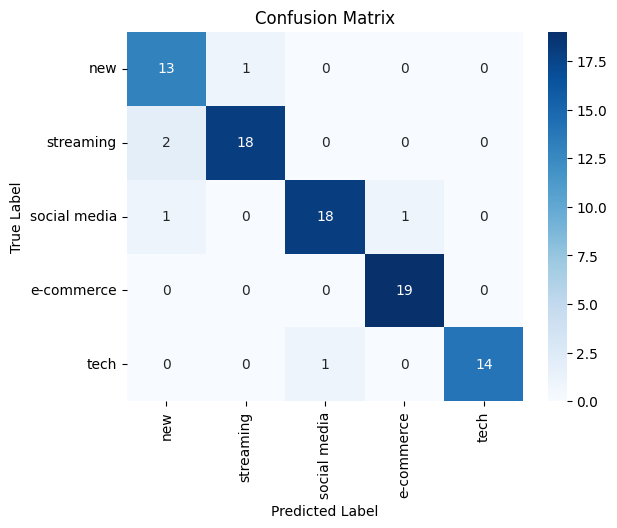

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

class_labels = ["new", "streaming", "social media", "e-commerce", "tech"]

# Create a heatmap using Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

KNearestNeighbors


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(X_prepared_train, y_train)

y_pred = neigh.predict(X_prepared_test)

print("Score")
print(neigh.score(X_prepared_test, y_test))
print(neigh.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.8409090909090909
0.9346590909090909
Classification Report
              precision    recall  f1-score   support

  e-commerce       0.81      0.93      0.87        14
        news       0.82      0.90      0.86        20
social media       0.93      0.70      0.80        20
   streaming       0.89      0.84      0.86        19
        tech       0.76      0.87      0.81        15

    accuracy                           0.84        88
   macro avg       0.84      0.85      0.84        88
weighted avg       0.85      0.84      0.84        88

Accuracy: 0.8409090909090909


Naive Bayes Classifier (BEFORE HYPERPARAM TUNING)

In [ ]:
clf = GaussianNB()
clf.fit(X_prepared_train, y_train)
y_pred = clf.predict(X_prepared_test)

print("Score")
print(clf.score(X_prepared_test, y_test))
print(clf.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.9545454545454546
1.0
Classification Report
              precision    recall  f1-score   support

  e-commerce       1.00      0.93      0.96        14
        news       1.00      0.85      0.92        20
social media       0.95      1.00      0.98        20
   streaming       0.86      1.00      0.93        19
        tech       1.00      1.00      1.00        15

    accuracy                           0.95        88
   macro avg       0.96      0.96      0.96        88
weighted avg       0.96      0.95      0.95        88

Accuracy: 0.9545454545454546


Naive Bayes Classifier (AFTER HYPERPARAM TUNING)

In [ ]:
# implemented grid search

parameters = {'var_smoothing': np.logspace(0,-0.75, num=5)} # var_smoothing from 1e0 to 1e-3
grid_search = GridSearchCV(estimator=clf, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_prepared_train, y_train)
best_var_smoothing = grid_search.best_params_['var_smoothing']
best_clf = GaussianNB(var_smoothing=best_var_smoothing)
best_clf.fit(X_prepared_train, y_train)

# clf.fit(X_prepared_train, y_train)
# y_pred = clf.predict(X_prepared_test)
y_pred = best_clf.predict(X_prepared_test)

print("Score")
print(best_clf.score(X_prepared_test, y_test))
print(best_clf.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.6477272727272727
0.7926136363636364
Classification Report
              precision    recall  f1-score   support

  e-commerce       0.50      0.50      0.50        14
        news       0.68      0.75      0.71        20
social media       0.88      0.35      0.50        20
   streaming       0.58      0.79      0.67        19
        tech       0.72      0.87      0.79        15

    accuracy                           0.65        88
   macro avg       0.67      0.65      0.63        88
weighted avg       0.68      0.65      0.63        88

Accuracy: 0.6477272727272727


Neural Net Classifier (BEFORE HYPERPARAM TUNING)

In [ ]:
# changed solver to adam

clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_prepared_train, y_train)
y_pred = clf.predict(X_prepared_test)

print("Score")
print(clf.score(X_prepared_test, y_test))
print(clf.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.5795454545454546
0.7017045454545454
Classification Report
              precision    recall  f1-score   support

  e-commerce       0.40      1.00      0.57        14
        news       0.77      0.50      0.61        20
social media       0.60      0.15      0.24        20
   streaming       0.80      0.63      0.71        19
        tech       0.60      0.80      0.69        15

    accuracy                           0.58        88
   macro avg       0.63      0.62      0.56        88
weighted avg       0.65      0.58      0.55        88

Accuracy: 0.5795454545454546


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Net Classifier (AFTER HYPERPARAM TUNING)

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(10, 2), random_state=1)
clf.fit(X_prepared_train, y_train)
y_pred = clf.predict(X_prepared_test)

print("Score")
print(clf.score(X_prepared_test, y_test))
print(clf.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.875
0.9431818181818182
Classification Report
              precision    recall  f1-score   support

  e-commerce       0.60      0.86      0.71        14
        news       0.94      0.80      0.86        20
social media       1.00      0.90      0.95        20
   streaming       0.89      0.89      0.89        19
        tech       1.00      0.93      0.97        15

    accuracy                           0.88        88
   macro avg       0.89      0.88      0.88        88
weighted avg       0.90      0.88      0.88        88

Accuracy: 0.875




Gaussian Process Classifier

In [ ]:
clf = GaussianProcessClassifier()
clf.fit(X_prepared_train, y_train)
y_pred = clf.predict(X_prepared_test)

print("Score")
print(clf.score(X_prepared_test, y_test))
print(clf.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Score
0.7613636363636364
1.0
Classification Report
              precision    recall  f1-score   support

  e-commerce       1.00      0.71      0.83        14
        news       1.00      0.70      0.82        20
social media       1.00      0.65      0.79        20
   streaming       1.00      0.79      0.88        19
        tech       0.42      1.00      0.59        15

    accuracy                           0.76        88
   macro avg       0.88      0.77      0.78        88
weighted avg       0.90      0.76      0.79        88

Accuracy: 0.7613636363636364


Gaussian Process Classifier with Tuning

In [ ]:
clf = GaussianProcessClassifier(kernel = 1*RationalQuadratic(alpha=1, length_scale=1))
clf.fit(X_prepared_train, y_train)
y_pred = clf.predict(X_prepared_test)

print("Score")
print(clf.score(X_prepared_test, y_test))
print(clf.score(X_prepared_train, y_train))

print("Classification Report")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Score
0.75
0.75
Classification Report
              precision    recall  f1-score   support

  e-commerce       0.39      0.50      0.44        14
        news       0.83      1.00      0.91        20
social media       0.91      1.00      0.95        20
   streaming       0.79      1.00      0.88        19
        tech       0.00      0.00      0.00        15

    accuracy                           0.75        88
   macro avg       0.58      0.70      0.64        88
weighted avg       0.63      0.75      0.68        88

Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Regressors

Linear Reg

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_prepared_train, y_prepared_train)

# Make predictions using the test set
y_pred = regr.predict(X_prepared_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_prepared_test, y_pred))
mse = mean_squared_error(y_prepared_test, y_pred)
rmse = np.sqrt(mse)
print(f"rmse is {rmse}")


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_prepared_train, y_prepared_train)

X_predictions = forest_reg.predict(X_prepared_test)
forest_mse = mean_squared_error(y_prepared_test, X_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
def display_scores(scores):
    print("Cross Validation Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_prepared_train, y_prepared_train,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

In [ ]:

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_prepared_train, y_prepared_train)

X_predictions = log_reg.predict(X_prepared_test)
log_mse = mean_squared_error(y_prepared_test, X_predictions)
log_rmse = np.sqrt(log_mse)
log_rmse

Ridge

In [ ]:
from sklearn.linear_model import Ridge

log_reg = Ridge()
log_reg.fit(X_prepared_train, y_prepared_train)

X_predictions = log_reg.predict(X_prepared_test)
log_mse = mean_squared_error(y_prepared_test, X_predictions)
log_rmse = np.sqrt(log_mse)
log_rmse

baggingregressor

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor


log_reg = BaggingRegressor(base_estimator = KNeighborsRegressor(), random_state=42)
log_reg.fit(X_prepared_train, y_prepared_train)

X_predictions = log_reg.predict(X_prepared_test)
log_mse = mean_squared_error(y_prepared_test, X_predictions)
log_rmse = np.sqrt(log_mse)
log_rmse

# Princeton Dataset (DO NOT RUN)

In [ ]:
!wget -O dump.sql.bz2 "http://webtransparency.cs.princeton.edu/webcensus/data/census_2016_01_10k_id_detection_1.sql.bz2"


In [ ]:
!bzip2 -d dump.sql.bz2

In [ ]:
import pandas as pd
import sqlite3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install pgloader
!apt-get install pgloader
file_path = "/content/drive/MyDrive/Privacy Final Project/dump.sql"
!pgloader '/content/drive/MyDrive/Privacy Final Project/dump.sql' sqlite://database.sqlite

In [ ]:
file_path = "/content/drive/MyDrive/Privacy Final Project/dump.sql"

# Read SQL file
with open(file_path, 'r') as sql_file:
    sql_script = sql_file.read()

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Execute the SQL script
cursor.execute(sql_script)

# Commit changes and close the connection
conn.commit()
conn.close()